In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import matplotlib_venn
from matplotlib_venn import venn3

In [4]:
neurons = pd.read_csv('/Users/SydneyWalker/Downloads/neurons.csv.gz')
connections = pd.read_csv('/Users/SydneyWalker/Downloads/connections.csv.gz')
sugar_neurons = pd.read_csv('/Users/SydneyWalker/Downloads/sugar_neurons.csv').query("side == 'left'")
bitter_neurons = pd.read_csv('/Users/SydneyWalker/Downloads/bitter_neurons.csv').query("side == 'left'")
water_neurons = pd.read_csv('/Users/SydneyWalker/Downloads/water_neurons.csv').query("side == 'left'")[['root_id','label','output_synapses']]
lowsalt_neurons = pd.read_csv('/Users/SydneyWalker/Downloads/lowsalt_neurons.csv').query("side == 'left'")[['root_id','label','output_synapses']]

In [5]:
sugar_downstream = pd.read_csv('/Users/SydneyWalker/Downloads/sugar_downstream.csv').query("side == 'left'")[['root_id','label','input_synapses']]
bitter_downstream = pd.read_csv('/Users/SydneyWalker/Downloads/bitter_downstream.csv').query("side == 'left'")[['root_id','label','input_synapses']]
water_downstream = pd.read_csv('/Users/SydneyWalker/Downloads/water_downstream.csv').query("side == 'left'")[['root_id','label','input_synapses']]
lowsalt_downstream = pd.read_csv('/Users/SydneyWalker/Downloads/lowsalt_downstream.csv')[['root_id','label','input_synapses']]

In [6]:
results = connections.groupby(['pre_root_id', 'post_root_id','neuropil'])['syn_count'].sum().reset_index()

In [7]:
def function(result, taste_neurons, neuron_downstream, name):
    merge = pd.merge(result, taste_neurons['root_id'], left_on = 'pre_root_id', right_on = 'root_id', how = 'inner')
    merge = merge.drop(columns='root_id')
    merge2 = pd.merge(merge, neuron_downstream, left_on = 'post_root_id', right_on = 'root_id', how = 'inner')
    connections = merge2.groupby('post_root_id')['syn_count'].sum().reset_index()
    labels = pd.merge(connections, neuron_downstream,left_on = 'post_root_id', right_on = 'root_id', how = 'inner')
    labels = labels.drop(columns = 'root_id')
    labels.rename(columns={'input_synapses': 'total_#_input_synapses','syn_count':'#_input_' + name + '_synapses','post_root_id':'second_order_cell_ID'}, inplace=True)
    labels['% input from ' + name + ' GRNs'] = labels['#_input_' + name + '_synapses'] / labels['total_#_input_synapses'] * 100
    labels = labels.sort_values(by = '% input from ' + name + ' GRNs', ascending = False)
    return labels

In [8]:
# def shui(result, taste_neurons, neuron_downstream, name):
#     merge = pd.merge(result, taste_neurons['root_id', left_on = 'pre_root_id', right_on = 'root_id', how = 'inner'])

In [9]:
sugar_data = function(results, sugar_neurons, sugar_downstream, "sugar")
bitter_data = function(results, bitter_neurons, bitter_downstream, "bitter")
water_data = function(results, water_neurons, water_downstream, "water")
lowsalt_data = function(results, lowsalt_neurons, lowsalt_downstream, "lowsalt")

In [10]:
sugar_data[0:73]

,second_order_cell_ID,#_input_sugar_synapses,label,total_#_input_synapses,% input from sugar GRNs
67,720575940642361485,10,[],10,100.000000
57,720575940637568838,48,['Sugar Gustatory Receptor Neuron (GRN); See E...,107,44.859813
44,720575940629888530,491,['Second-order gustatory neuron Zorro (Shiu; S...,1391,35.298347
45,720575940630233916,34,['labial GRN'; 'Sugar Gustatory Receptor Neuro...,100,34.000000
21,720575940620874757,321,['G2N-1; Second-order taste neuron'],993,32.326284
...,...,...,...,...,...
4,720575940612611301,5,['unclassified_IN_FW_254'],1222,0.409165
33,720575940625175054,5,[],1289,0.387898
16,720575940618574749,39,['descending_FW_48'; 'DNg'],10072,0.387212
7,720575940612692633,5,['unclassified_IN_FW_514'],2734,0.182882


In [11]:
sugar_data.sort_values(by = '#_input_sugar_synapses', ascending = False)[0:10]

,second_order_cell_ID,#_input_sugar_synapses,label,total_#_input_synapses,% input from sugar GRNs
44,720575940629888530,491,['Second-order gustatory neuron Zorro (Shiu; S...,1391,35.298347
21,720575940620874757,321,['G2N-1; Second-order taste neuron'],993,32.326284
40,720575940627383685,320,['Second-order gustatory neuron Billiards (Shi...,1053,30.389364
38,720575940626191306,268,['Second-order gustatory neuron Fuchs (Shiu; S...,1038,25.818882
72,720575940655014049,254,['ascending_FW_251'; 'Clavicle; Second-order t...,1357,18.717760
19,720575940619973712,219,['Second-order gustatory neuron Quasimodo'; 'u...,1479,14.807302
59,720575940638103349,190,['Second-order gustatory neuron Rattle; See St...,2088,9.099617
10,720575940614763666,185,['Second-order gustatory neuron FMIN (Sterne e...,1312,14.100610
53,720575940632648612,162,['Second-order gustatory neuron Usnea (Sterne ...,684,23.684211
12,720575940616103218,121,['Phantom; Second-order taste neuron'],601,20.133111


In [12]:
water_data

,second_order_cell_ID,#_input_water_synapses,label,total_#_input_synapses,% input from water GRNs
22,720575940622486922,43,['labial GRN'; 'gustatory receptor neuron/GRN?'],74,58.108108
33,720575940627821896,6,[],11,54.545455
2,720575940612579053,23,['gustatory receptor neuron/GRN?'],47,48.936170
5,720575940612950568,26,[],56,46.428571
10,720575940616103218,272,['Phantom; Second-order taste neuron'],601,45.257903
3,720575940612648106,150,['Fudog (Sterne et al.; 10.7554/eLife.71679; S...,347,43.227666
44,720575940635172191,17,['taste sensory (gustatory) neurons'],45,37.777778
24,720575940623629292,5,['labial GRN'],17,29.411765
50,720575940639274147,273,[],970,28.144330
42,720575940632648612,151,['Second-order gustatory neuron Usnea (Sterne ...,684,22.076023


In [13]:
bitter_data

,second_order_cell_ID,#_input_bitter_synapses,label,total_#_input_synapses,% input from bitter GRNs
35,720575940638557312,122,['Mime; Putative second-order bitter neuron; S...,499,24.448898
23,720575940626287336,11,['labellar bitter gustatory receptor neuron (G...,47,23.404255
18,720575940624273149,46,['Mime; Putative second-order bitter neuron; S...,316,14.556962
34,720575940637742150,74,['Mime; Putative second-order bitter neuron; S...,516,14.341085
31,720575940634788247,56,['Mime; Putative second-order bitter neuron; S...,440,12.727273
17,720575940624253991,47,['Mime; Putative second-order bitter neuron; S...,380,12.368421
4,720575940614139089,27,[],274,9.854015
26,720575940628024107,16,['ALPN; VP2_lvPN'],171,9.356725
15,720575940623381286,98,['unclassified_IN_FW_447'; 'taste peg gustator...,1081,9.065680
10,720575940620553094,381,['SEZ interneuron closely matching GRN arbors'],4534,8.403176


In [14]:
lowsalt_data

,second_order_cell_ID,#_input_lowsalt_synapses,label,total_#_input_synapses,% input from lowsalt GRNs
21,720575940624234254,233,[],591,39.424704
28,720575940631082124,54,['lGRN'; 'Gustatory Receptor Neuron (GRN); Put...,142,38.028169
18,720575940621953285,228,['WEDa1_ventral'],673,33.878158
2,720575940610683315,44,['Gustatory Receptor Neuron (GRN); Putative Ir...,130,33.846154
25,720575940628198503,54,['lGRN'; 'Gustatory Receptor Neuron (GRN); Put...,178,30.337079
17,720575940621375231,29,['lGRN'; 'Gustatory Receptor Neuron (GRN); Put...,102,28.431373
23,720575940626016017,39,['lGRN'; 'Gustatory Receptor Neuron (GRN); Put...,140,27.857143
38,720575940638218173,33,['Gustatory Receptor Neuron (GRN); Putative Ir...,120,27.500000
20,720575940624079544,33,['lGRN'; 'Gustatory Receptor Neuron (GRN); Put...,136,24.264706
40,720575940646250804,25,['mAL5'; 'fru'; 'mALb; put_AVM15nC'],110,22.727273


In [15]:
def overlap(neuron_data1, neuron_data2, taste1, taste2):
    merge = pd.merge(neuron_data1[['second_order_cell_ID', 'label','#_input_' + taste1 + '_synapses', '% input from ' + taste1 + ' GRNs']], neuron_data2[['second_order_cell_ID', '#_input_' + taste2 + '_synapses','% input from ' + taste2 + ' GRNs','total_#_input_synapses']], on= 'second_order_cell_ID', how = 'inner')
    return merge

In [16]:
sugarwater = overlap(sugar_data, water_data, "sugar", "water")
sugarbitter = overlap(sugar_data, bitter_data, "sugar", "bitter")
waterbitter = overlap(water_data, bitter_data, "water", "bitter")
sugarlowsalt = overlap(sugar_data, lowsalt_data, "sugar", "lowsalt")
waterlowsalt =  overlap(water_data, lowsalt_data, "water", "lowsalt")
lowsaltbitter = overlap(lowsalt_data, bitter_data, "lowsalt", "bitter")

In [17]:
sugarwater

,second_order_cell_ID,label,#_input_sugar_synapses,% input from sugar GRNs,#_input_water_synapses,% input from water GRNs,total_#_input_synapses
0,720575940629888530,['Second-order gustatory neuron Zorro (Shiu; S...,491,35.298347,250,17.972682,1391
1,720575940620874757,['G2N-1; Second-order taste neuron'],321,32.326284,49,4.934542,993
2,720575940627383685,['Second-order gustatory neuron Billiards (Shi...,320,30.389364,17,1.614435,1053
3,720575940616885538,['labial GRN'; 'Sugar Gustatory Receptor Neuro...,54,28.571429,9,4.761905,189
4,720575940626191306,['Second-order gustatory neuron Fuchs (Shiu; S...,268,25.818882,28,2.697495,1038
5,720575940632648612,['Second-order gustatory neuron Usnea (Sterne ...,162,23.684211,151,22.076023,684
6,720575940612670570,['Possible Sugar Gustatory Receptor Neuron (GR...,37,20.441989,5,2.762431,181
7,720575940616103218,['Phantom; Second-order taste neuron'],121,20.133111,272,45.257903,601
8,720575940619588568,['unclassified_IN_FW_598'],46,19.008264,52,21.487603,242
9,720575940655014049,['ascending_FW_251'; 'Clavicle; Second-order t...,254,18.717760,206,15.180545,1357


In [18]:
sugarbitter

,second_order_cell_ID,label,#_input_sugar_synapses,% input from sugar GRNs,#_input_bitter_synapses,% input from bitter GRNs,total_#_input_synapses
0,720575940625867056,['unclassified_IN_FW_259'],36,2.126403,7,0.413467,1693
1,720575940614418794,['ascending_FW_73'],6,1.151631,6,1.151631,521
2,720575940611149922,[],5,0.173370,16,0.554785,2884


In [19]:
waterbitter

,second_order_cell_ID,label,#_input_water_synapses,% input from water GRNs,#_input_bitter_synapses,% input from bitter GRNs,total_#_input_synapses
0,720575940634788247,['Mime; Putative second-order bitter neuron; S...,14,3.181818,56,12.727273,440
1,720575940624273149,['Mime; Putative second-order bitter neuron; S...,5,1.582278,46,14.556962,316
2,720575940637742150,['Mime; Putative second-order bitter neuron; S...,6,1.162791,74,14.341085,516
3,720575940625728551,['unclassified_IN_FW_468'],6,0.411805,101,6.932052,1457
4,720575940636541285,['unclassified_IN_FW_609'],10,0.395257,13,0.513834,2530
5,720575940611149922,[],7,0.242718,16,0.554785,2884


In [20]:
sugarlowsalt

,second_order_cell_ID,label,#_input_sugar_synapses,% input from sugar GRNs,#_input_lowsalt_synapses,% input from lowsalt GRNs,total_#_input_synapses
0,720575940642335373,[],14,1.170569,12,1.003344,1196
1,720575940633198284,['unclassified_IN_FW_389'],9,0.821918,6,0.547945,1095


In [21]:
waterlowsalt

,second_order_cell_ID,label,#_input_water_synapses,% input from water GRNs,#_input_lowsalt_synapses,% input from lowsalt GRNs,total_#_input_synapses
0,720575940614128691,[],14,1.19863,39,3.339041,1168


In [22]:
lowsaltbitter

,second_order_cell_ID,label,#_input_lowsalt_synapses,% input from lowsalt GRNs,#_input_bitter_synapses,% input from bitter GRNs,total_#_input_synapses
0,720575940620553094,['SEZ interneuron closely matching GRN arbors'],442,9.748566,381,8.403176,4534
1,720575940630575943,['Mime; Putative second-order bitter neuron; S...,14,3.713528,11,2.917772,377
2,720575940628683063,[],27,2.261307,57,4.773869,1194
3,720575940610956334,['Turner; See Sterne et al.; 2021; https://doi...,5,0.777605,11,1.710731,643
4,720575940627709956,['up_DN1_IN_6'],5,0.475737,42,3.996194,1051
5,720575940624600840,['Second-order bitter neuron Scapula (Shiu; St...,7,0.186567,231,6.156716,3752


Text(0.5, 1.0, 'Downstream GRN Crossover')

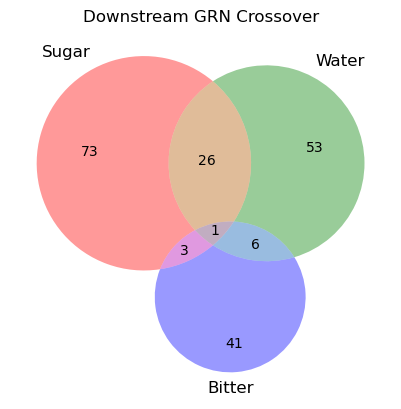

In [23]:
sugar = set(sugar_downstream['root_id'])
water = set(water_downstream['root_id'])
bitter = set(bitter_downstream['root_id'])

size_sugar = len(sugar)
size_water = len(water)
size_bitter = len(bitter)
overlap_sugarwater = len(sugar.intersection(water))
overlap_sugarbitter = len(sugar.intersection(bitter))
overlap_waterbitter = len(water.intersection(bitter))
overlap_sugarwaterbitter = len(sugar.intersection(water).intersection(bitter))

venn = venn3(subsets=(size_sugar, size_water, overlap_sugarwater, size_bitter, overlap_sugarbitter, overlap_waterbitter, overlap_sugarwaterbitter),
             set_labels=('Sugar', 'Water', 'Bitter'))

plt.title("Downstream GRN Crossover")

Text(0.5, 1.0, 'Downstream GRN Crossover')

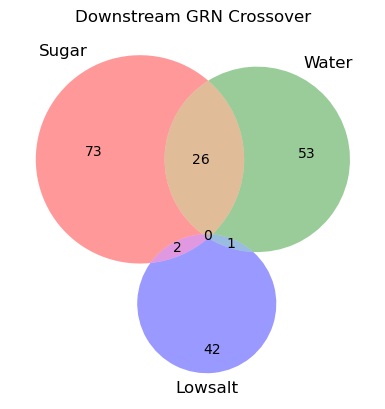

In [24]:
sugar = set(sugar_downstream['root_id'])
water = set(water_downstream['root_id'])
lowsalt = set(lowsalt_downstream['root_id'])

size_sugar = len(sugar)
size_water = len(water)
size_lowsalt = len(lowsalt)
overlap_sugarwater = len(sugar.intersection(water))
overlap_sugarlowsalt = len(sugar.intersection(lowsalt))
overlap_waterlowsalt = len(water.intersection(lowsalt))
overlap_sugarwaterlowsalt = len(sugar.intersection(water).intersection(lowsalt))

venn = venn3(subsets=(size_sugar, size_water, overlap_sugarwater, size_lowsalt, overlap_sugarlowsalt, overlap_waterlowsalt, overlap_sugarwaterlowsalt),
             set_labels=('Sugar', 'Water', 'Lowsalt'))

plt.title("Downstream GRN Crossover")

Text(0.5, 1.0, 'Downstream GRN Crossover')

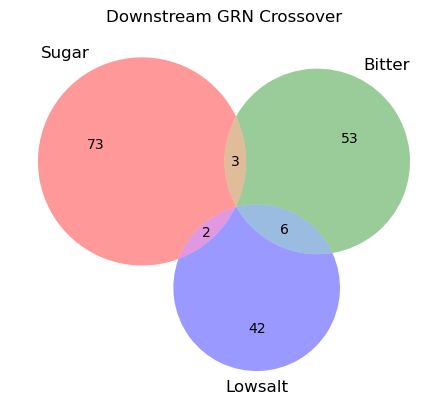

In [25]:
sugar = set(sugar_downstream['root_id'])
bitter = set(bitter_downstream['root_id'])
lowsalt = set(lowsalt_downstream['root_id'])

size_sugar = len(sugar)
size_bitter = len(water)
size_lowsalt = len(lowsalt)
overlap_sugarbitter = len(sugar.intersection(bitter))
overlap_sugarlowsalt = len(sugar.intersection(lowsalt))
overlap_bitterlowsalt = len(bitter.intersection(lowsalt))
overlap_sugarbitterlowsalt = len(sugar.intersection(bitter).intersection(lowsalt))

venn = venn3(subsets=(size_sugar, size_bitter, overlap_sugarbitter, size_lowsalt, overlap_sugarlowsalt, overlap_bitterlowsalt, overlap_sugarbitterlowsalt),
             set_labels=('Sugar', 'Bitter', 'Lowsalt'))

plt.title("Downstream GRN Crossover")

Text(0.5, 1.0, 'Downstream GRN Crossover')

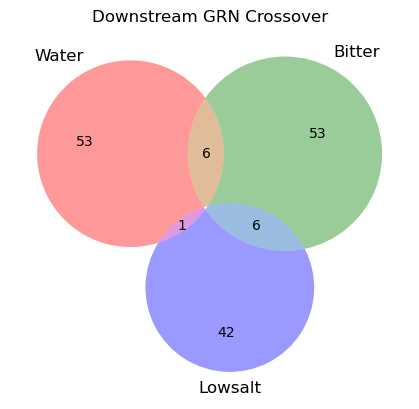

In [26]:
water = set(water_downstream['root_id'])
bitter = set(bitter_downstream['root_id'])
lowsalt = set(lowsalt_downstream['root_id'])

size_water = len(water)
size_bitter = len(water)
size_lowsalt = len(lowsalt)
overlap_waterbitter = len(water.intersection(bitter))
overlap_waterlowsalt = len(water.intersection(lowsalt))
overlap_bitterlowsalt = len(bitter.intersection(lowsalt))
overlap_waterbitterlowsalt = len(water.intersection(bitter).intersection(lowsalt))

venn = venn3(subsets=(size_water, size_bitter, overlap_waterbitter, size_lowsalt, overlap_waterlowsalt, overlap_bitterlowsalt, overlap_waterbitterlowsalt),
             set_labels=('Water', 'Bitter', 'Lowsalt'))

plt.title("Downstream GRN Crossover")

In [27]:
input = []

for entry in sugar_downstream['input_synapses']:
    input.append(entry)
for entry in water_downstream['input_synapses']:
    input.append(entry)
for entry in bitter_downstream['input_synapses']:
    input.append(entry)
for entry in lowsalt_downstream['input_synapses']:
    input.append(entry)

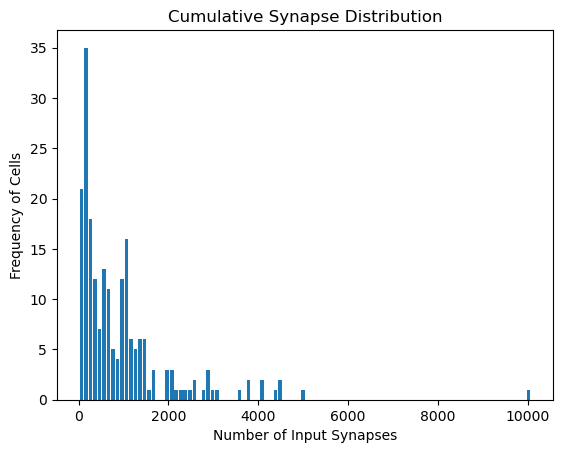

In [28]:
data = input

num_bins = 100
bins = np.linspace(min(data), max(data), num_bins + 1)
frequencies, bin_edges = np.histogram(data, bins)
bin_labels = [(bins[i] + bins[i+1]) / 2 for i in range(len(bins)-1)]
plt.bar(bin_labels, frequencies, width=(max(data) - min(data)) / num_bins * 0.8, align='center')
plt.xlabel('Number of Input Synapses')
plt.ylabel('Frequency of Cells')
plt.title('Cumulative Synapse Distribution')
plt.show()

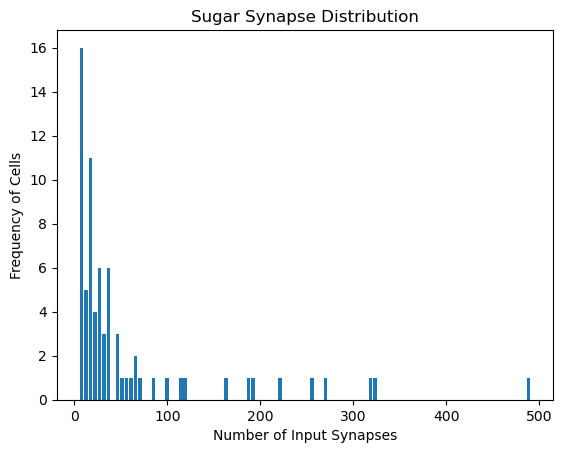

In [29]:
data = sugar_data['#_input_sugar_synapses'] 

num_bins = 100
bins = np.linspace(min(data), max(data), num_bins + 1)
frequencies, bin_edges = np.histogram(data, bins)
bin_labels = [(bins[i] + bins[i+1]) / 2 for i in range(len(bins)-1)]
plt.bar(bin_labels, frequencies, width=(max(data) - min(data)) / num_bins * 0.8, align='center')
plt.xlabel('Number of Input Synapses')
plt.ylabel('Frequency of Cells')
plt.title('Sugar Synapse Distribution')
plt.show()

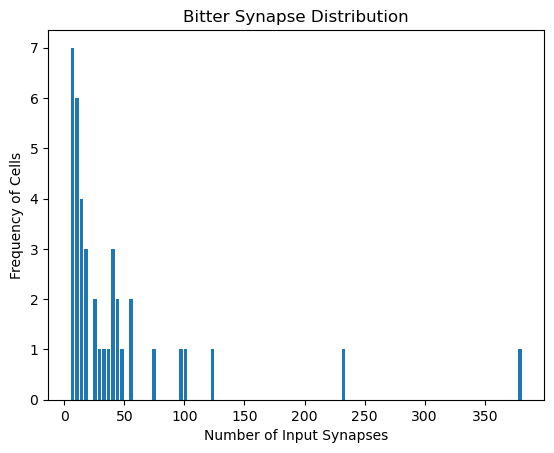

In [30]:
data = bitter_data['#_input_bitter_synapses'] 

num_bins = 100
bins = np.linspace(min(data), max(data), num_bins + 1)
frequencies, bin_edges = np.histogram(data, bins)
bin_labels = [(bins[i] + bins[i+1]) / 2 for i in range(len(bins)-1)]
plt.bar(bin_labels, frequencies, width=(max(data) - min(data)) / num_bins * 0.8, align='center')
plt.xlabel('Number of Input Synapses')
plt.ylabel('Frequency of Cells')
plt.title('Bitter Synapse Distribution')
plt.show()

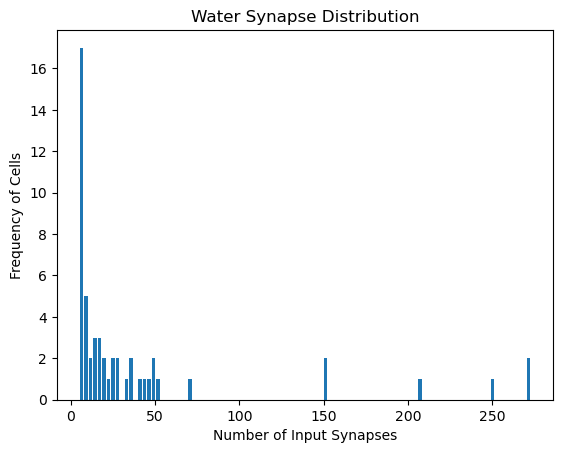

In [31]:
data = water_data['#_input_water_synapses'] 

num_bins = 100
bins = np.linspace(min(data), max(data), num_bins + 1)
frequencies, bin_edges = np.histogram(data, bins)
bin_labels = [(bins[i] + bins[i+1]) / 2 for i in range(len(bins)-1)]
plt.bar(bin_labels, frequencies, width=(max(data) - min(data)) / num_bins * 0.8, align='center')
plt.xlabel('Number of Input Synapses')
plt.ylabel('Frequency of Cells')
plt.title('Water Synapse Distribution')
plt.show()

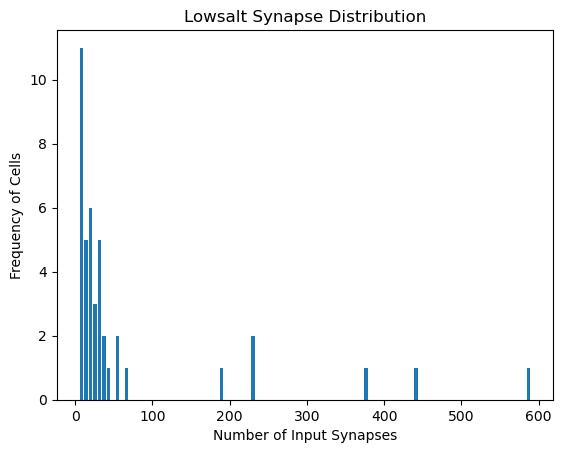

In [32]:
data = lowsalt_data['#_input_lowsalt_synapses']

num_bins = 100
bins = np.linspace(min(data), max(data), num_bins + 1)
frequencies, bin_edges = np.histogram(data, bins)
bin_labels = [(bins[i] + bins[i+1]) / 2 for i in range(len(bins)-1)]
plt.bar(bin_labels, frequencies, width=(max(data) - min(data)) / num_bins * 0.8, align='center')
plt.xlabel('Number of Input Synapses')
plt.ylabel('Frequency of Cells')
plt.title('Lowsalt Synapse Distribution')
plt.show()

In [33]:
def third_order(neuron_data, connection_dataset,taste_neurons):
    for entry in neuron_data['second_order_cell_ID']:
        if entry in sugar_neurons['root_id']:
            pass
        else:
            merge = pd.merge(neuron_data[['second_order_cell_ID','label']], connections, left_on='second_order_cell_ID', right_on='pre_root_id', how = 'inner').query("syn_count >=5")
        merge = merge.drop(columns = 'pre_root_id')
        merge = merge.rename(columns={'post_root_id':'third_order_cell_ID','label':'second_order_cell_label'})
        def projection(neuropil):
            if neuropil == 'GNG':
                return 'local'
            else: 
                return 'outside SEZ'
        merge['location_of_connection'] = merge['neuropil'].apply(projection)
        return merge

In [34]:
sugar_third_order = third_order(sugar_data, connections, sugar_neurons)
bitter_third_order = third_order(bitter_data, connections, bitter_neurons)
water_third_order = third_order(water_data, connections, water_neurons)
lowsalt_third_order = third_order(lowsalt_data, connections, lowsalt_neurons)

In [35]:
# value_counts = df['third_order_cell_ID'].value_counts()
# print(value_counts)

In [36]:
sugar_third_order[sugar_third_order['third_order_cell_ID'] == 720575940619973712]

,second_order_cell_ID,second_order_cell_label,third_order_cell_ID,neuropil,syn_count,nt_type,location_of_connection
6,720575940642361485,[],720575940619973712,GNG,9,ACH,local
21,720575940637568838,['Sugar Gustatory Receptor Neuron (GRN); See E...,720575940619973712,GNG,5,DA,local
46,720575940629888530,['Second-order gustatory neuron Zorro (Shiu; S...,720575940619973712,GNG,8,ACH,local
126,720575940620874757,['G2N-1; Second-order taste neuron'],720575940619973712,GNG,22,ACH,local
258,720575940616885538,['labial GRN'; 'Sugar Gustatory Receptor Neuro...,720575940619973712,GNG,9,ACH,local
280,720575940624963786,['Sugar Gustatory Receptor Neuron (GRN); See E...,720575940619973712,GNG,9,ACH,local
309,720575940617000768,['Sugar Gustatory Receptor Neuron (GRN); See E...,720575940619973712,GNG,15,ACH,local
640,720575940639332736,['GRN'; 'Sugar Gustatory Receptor Neuron (GRN)...,720575940619973712,GNG,7,ACH,local
654,720575940621502051,['Sugar Gustatory Receptor Neuron (GRN); See E...,720575940619973712,GNG,6,ACH,local
686,720575940612670570,['Possible Sugar Gustatory Receptor Neuron (GR...,720575940619973712,GNG,10,ACH,local


In [37]:
sugar_third_order['third_order_cell_ID'].sort_values().value_counts()

720575940619973712    25
720575940614763666    22
720575940629888530    21
720575940620874757    21
720575940622695448    21
                      ..
720575940623473335     1
720575940623476407     1
720575940623529610     1
720575940623554796     1
720575940660313729     1
Name: third_order_cell_ID, Length: 1296, dtype: int64

In [38]:
bitter_third_order

,second_order_cell_ID,second_order_cell_label,third_order_cell_ID,neuropil,syn_count,nt_type,location_of_connection
0,720575940638557312,['Mime; Putative second-order bitter neuron; S...,720575940607071106,PRW,7,ACH,outside SEZ
1,720575940638557312,['Mime; Putative second-order bitter neuron; S...,720575940608239371,PRW,6,ACH,outside SEZ
2,720575940638557312,['Mime; Putative second-order bitter neuron; S...,720575940610690372,PRW,6,ACH,outside SEZ
3,720575940638557312,['Mime; Putative second-order bitter neuron; S...,720575940610690372,GNG,11,ACH,local
4,720575940638557312,['Mime; Putative second-order bitter neuron; S...,720575940611149922,GNG,10,ACH,local
...,...,...,...,...,...,...,...
3954,720575940625867056,['unclassified_IN_FW_259'],720575940641281013,GNG,6,DA,local
3955,720575940625867056,['unclassified_IN_FW_259'],720575940641648091,GNG,9,DA,local
3957,720575940625867056,['unclassified_IN_FW_259'],720575940645039383,GNG,5,DA,local
3958,720575940625867056,['unclassified_IN_FW_259'],720575940645503854,GNG,5,DA,local


In [39]:
water_third_order

,second_order_cell_ID,second_order_cell_label,third_order_cell_ID,neuropil,syn_count,nt_type,location_of_connection
0,720575940622486922,['labial GRN'; 'gustatory receptor neuron/GRN?'],720575940607253170,GNG,7,GLUT,local
1,720575940622486922,['labial GRN'; 'gustatory receptor neuron/GRN?'],720575940612579053,GNG,5,ACH,local
2,720575940622486922,['labial GRN'; 'gustatory receptor neuron/GRN?'],720575940612648106,GNG,19,ACH,local
3,720575940622486922,['labial GRN'; 'gustatory receptor neuron/GRN?'],720575940612950568,GNG,9,GLUT,local
4,720575940622486922,['labial GRN'; 'gustatory receptor neuron/GRN?'],720575940616103218,GNG,28,GLUT,local
...,...,...,...,...,...,...,...
3163,720575940627814728,[],720575940637360730,GNG,10,ACH,local
3164,720575940627814728,[],720575940637656286,GNG,5,ACH,local
3165,720575940627814728,[],720575940638001498,GNG,28,ACH,local
3167,720575940627814728,[],720575940645045527,GNG,20,ACH,local


In [40]:
lowsalt_third_order

,second_order_cell_ID,second_order_cell_label,third_order_cell_ID,neuropil,syn_count,nt_type,location_of_connection
0,720575940624234254,[],720575940604395436,SLP_L,5,ACH,outside SEZ
2,720575940624234254,[],720575940604516524,LH_L,6,ACH,outside SEZ
3,720575940624234254,[],720575940604516524,SLP_L,44,ACH,outside SEZ
5,720575940624234254,[],720575940604921446,LH_R,13,ACH,outside SEZ
9,720575940624234254,[],720575940607731292,SLP_L,10,ACH,outside SEZ
...,...,...,...,...,...,...,...
4158,720575940624600840,['Second-order bitter neuron Scapula (Shiu; St...,720575940647003188,FLA_L,5,GLUT,outside SEZ
4159,720575940624600840,['Second-order bitter neuron Scapula (Shiu; St...,720575940652580086,GNG,9,GLUT,local
4160,720575940624600840,['Second-order bitter neuron Scapula (Shiu; St...,720575940660223873,PRW,6,GLUT,outside SEZ
4161,720575940624600840,['Second-order bitter neuron Scapula (Shiu; St...,720575940660223873,GNG,11,GLUT,local


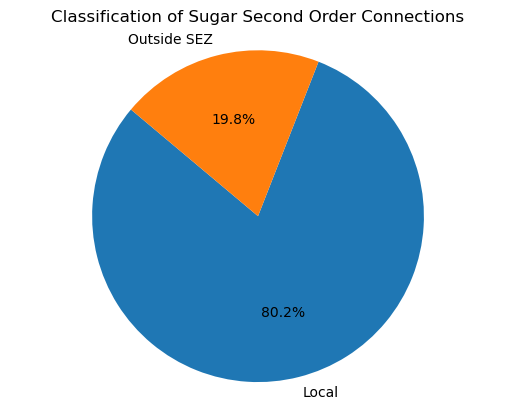

In [41]:
labels = ['Local', 'Outside SEZ']
sizes = [len(sugar_third_order.query("location_of_connection == 'local'")), len(sugar_third_order.query("location_of_connection == 'outside SEZ'"))]  
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Classification of Sugar Second Order Connections')
plt.axis('equal')
plt.show()

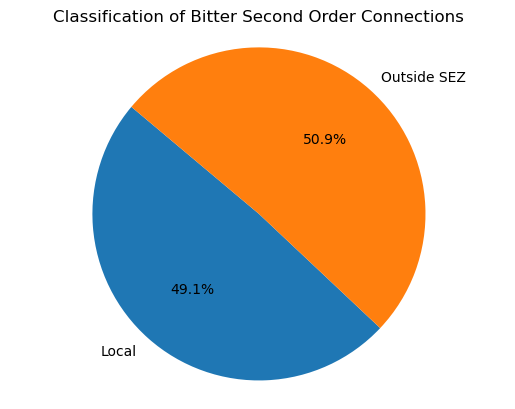

In [42]:
labels = ['Local', 'Outside SEZ']
sizes = [len(bitter_third_order.query("location_of_connection == 'local'")), len(bitter_third_order.query("location_of_connection == 'outside SEZ'"))]  
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Classification of Bitter Second Order Connections')
plt.axis('equal')
plt.show()

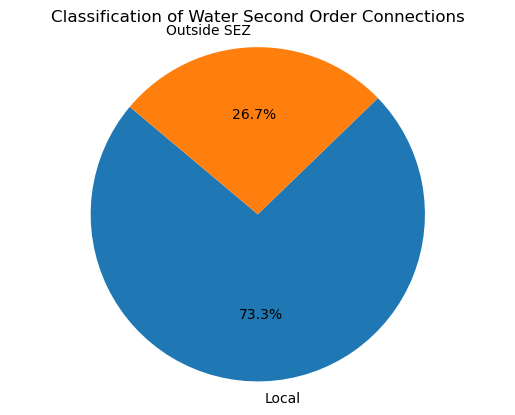

In [43]:
labels = ['Local', 'Outside SEZ']
sizes = [len(water_third_order.query("location_of_connection == 'local'")), len(water_third_order.query("location_of_connection == 'outside SEZ'"))]  
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Classification of Water Second Order Connections')
plt.axis('equal')
plt.show()

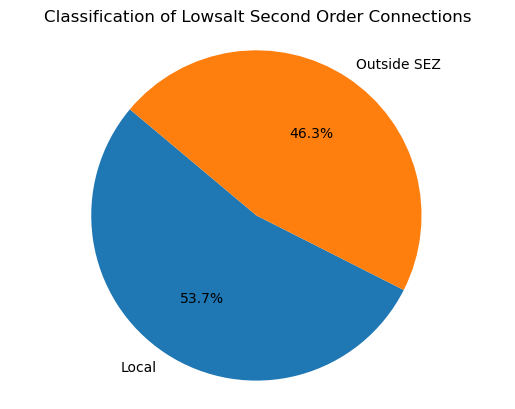

In [44]:
labels = ['Local', 'Outside SEZ']
sizes = [len(lowsalt_third_order.query("location_of_connection == 'local'")), len(lowsalt_third_order.query("location_of_connection == 'outside SEZ'"))]  
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Classification of Lowsalt Second Order Connections')
plt.axis('equal')
plt.show()

In [45]:
def classify(taste_third_order):
    classification = pd.DataFrame(columns = ['second_order_cell_ID', 'projection','#_of_external_projections'])
    unique_values = taste_third_order['second_order_cell_ID'].unique()
    for entry in unique_values:
        if all(taste_third_order[taste_third_order['second_order_cell_ID'] == entry]['location_of_connection'] == 'local'):
            x = pd.DataFrame({'second_order_cell_ID': [entry], 'projection':'local','#_of_external_projections':(taste_third_order[taste_third_order['second_order_cell_ID'] == entry]['location_of_connection'] == 'outside SEZ').sum()})
            classification = pd.concat([classification,x])
        else:
            x = pd.DataFrame({'second_order_cell_ID': [entry], 'projection':'outside SEZ','#_of_external_projections':(taste_third_order[taste_third_order['second_order_cell_ID'] == entry]['location_of_connection'] == 'outside SEZ').sum()})
            classification = pd.concat([classification,x])
    return classification

In [46]:
# def count(taste_third_order, taste_second_order_projection):
#     unique_values = taste_third_order['second_order_cell_ID'].unique()
#     for entry in unique_values:
#         taste_second_order_projection['#_of_external_projections'] = (taste_third_order[taste_third_order['second_order_cell_ID'] == entry]['location_of_connection'] == 'outside SEZ').sum()

In [47]:
# count(sugar_third_order, sugar_second_order_projection)
# sugar_second_order_projection

In [48]:
test = sugar_third_order[sugar_third_order['second_order_cell_ID'] == 720575940642361485]

In [49]:
test1 = sugar_third_order[sugar_third_order['second_order_cell_ID'] == 720575940625175054]
(test1['location_of_connection'] == 'outside SEZ').sum()

6

In [50]:
(sugar_third_order[sugar_third_order['second_order_cell_ID'] == 720575940625175054]['location_of_connection'] == 'outside SEZ').sum()

6

In [51]:
(sugar_third_order[sugar_third_order['second_order_cell_ID'] == 720575940625175054]['location_of_connection'] == 'local').sum()

39

In [52]:
(test['location_of_connection'] == 'local').sum()

20

In [53]:
# sugar_3N = pd.DataFrame(columns = ['third_order_cell_ID','#_upstream_cells'])

sugar_3N = pd.DataFrame(sugar_third_order['third_order_cell_ID'].sort_values().value_counts())

bitter_3N = pd.DataFrame(bitter_third_order['third_order_cell_ID'].sort_values().value_counts())

water_3N = pd.DataFrame(water_third_order['third_order_cell_ID'].sort_values().value_counts())

lowsalt_3N = pd.DataFrame(lowsalt_third_order['third_order_cell_ID'].sort_values().value_counts())

In [54]:
sugar_3N

,third_order_cell_ID
720575940619973712,25
720575940614763666,22
720575940629888530,21
720575940620874757,21
720575940622695448,21
...,...
720575940623473335,1
720575940623476407,1
720575940623529610,1
720575940623554796,1


In [55]:
# def count(taste_third_order):
#     counted = pd.DataFrame(columns = ['third_order_cell_ID','#_upstream_cells'])
#     unique_values = taste_third_order['third_order_cell_ID'].unique()
#     for entry in unique values:
#         x = pd.DataFrame({'third_order_cell_ID': [entry], '#_upstream_cells': taste_third_order['third_order_cell_ID'].sort_values().value_counts()})

In [56]:
#sugar_third_order

sugar_3N_ids = sugar_third_order['third_order_cell_ID'].unique()
sugar_3N = pd.DataFrame(sugar_3N_ids, columns=['third_order_cell_ID'])
sugar_3N

sugar_third_order[sugar_third_order['third_order_cell_ID'] == 720575940619973712]

def classify(taste_third_order):
    classification = pd.DataFrame(columns = ['second_order_cell_ID', 'projection','#_of_external_projections'])
    unique_values = taste_third_order['second_order_cell_ID'].unique()
    for entry in unique_values:
        if all(taste_third_order[taste_third_order['second_order_cell_ID'] == entry]['location_of_connection'] == 'local'):
            x = pd.DataFrame({'second_order_cell_ID': [entry], 'projection':'local','#_of_external_projections':(taste_third_order[taste_third_order['second_order_cell_ID'] == entry]['location_of_connection'] == 'outside SEZ').sum()})
            classification = pd.concat([classification,x])
        else:
            x = pd.DataFrame({'second_order_cell_ID': [entry], 'projection':'outside SEZ','#_of_external_projections':(taste_third_order[taste_third_order['second_order_cell_ID'] == entry]['location_of_connection'] == 'outside SEZ').sum()})
            classification = pd.concat([classification,x])
    return classification

In [57]:
bitter_3N_ids = bitter_third_order['third_order_cell_ID'].unique()
bitter_3N = pd.DataFrame(bitter_3N_ids, columns=['third_order_cell_ID'])
bitter_3N

,third_order_cell_ID
0,720575940607071106
1,720575940608239371
2,720575940610690372
3,720575940611149922
4,720575940616921152
...,...
1178,720575940635089306
1179,720575940636675214
1180,720575940645039383
1181,720575940645503854


In [58]:
lowsalt_3N_ids = lowsalt_third_order['third_order_cell_ID'].unique()
lowsalt_3N = pd.DataFrame(lowsalt_3N_ids, columns=['third_order_cell_ID'])
lowsalt_3N

,third_order_cell_ID
0,720575940604395436
1,720575940604516524
2,720575940604921446
3,720575940607731292
4,720575940608616899
...,...
1002,720575940635055039
1003,720575940635576767
1004,720575940639787683
1005,720575940647003188


In [59]:
water_3N_ids = water_third_order['third_order_cell_ID'].unique()
water_3N = pd.DataFrame(water_3N_ids, columns=['third_order_cell_ID'])
water_3N

,third_order_cell_ID
0,720575940607253170
1,720575940612579053
2,720575940612648106
3,720575940612950568
4,720575940616103218
...,...
1054,720575940629081849
1055,720575940632587932
1056,720575940636685454
1057,720575940638001498


In [60]:
lowsalt

{720575940604891360,
 720575940610550830,
 720575940610683315,
 720575940610956334,
 720575940611715813,
 720575940612920386,
 720575940613524973,
 720575940614128691,
 720575940614211295,
 720575940614635175,
 720575940615274425,
 720575940616759014,
 720575940619034782,
 720575940619185031,
 720575940620553094,
 720575940620627803,
 720575940621218694,
 720575940621375231,
 720575940621953285,
 720575940623696362,
 720575940624079544,
 720575940624234254,
 720575940624600840,
 720575940626016017,
 720575940627709956,
 720575940628198503,
 720575940628683063,
 720575940630575943,
 720575940631082124,
 720575940631092943,
 720575940631448874,
 720575940632894690,
 720575940633198284,
 720575940634090777,
 720575940634186906,
 720575940634462304,
 720575940635642725,
 720575940637956698,
 720575940638218173,
 720575940642335373,
 720575940646250804,
 720575940646663044}

In [61]:
sugar_second_order_projection = classify(sugar_third_order)
bitter_second_order_projection = classify(bitter_third_order)
water_second_order_projection = classify(water_third_order)
lowsalt_second_order_projection = classify(lowsalt_third_order)

In [62]:
lowsalt_second_order_projection[lowsalt_second_order_projection['#_of_external_projections'] != 0]

,second_order_cell_ID,projection,#_of_external_projections
0,720575940624234254,outside SEZ,83
0,720575940621953285,outside SEZ,12
0,720575940646250804,outside SEZ,2
0,720575940621218694,outside SEZ,41
0,720575940631092943,outside SEZ,7
0,720575940614211295,outside SEZ,4
0,720575940612920386,outside SEZ,3
0,720575940619185031,outside SEZ,12
0,720575940620553094,outside SEZ,59
0,720575940615274425,outside SEZ,4


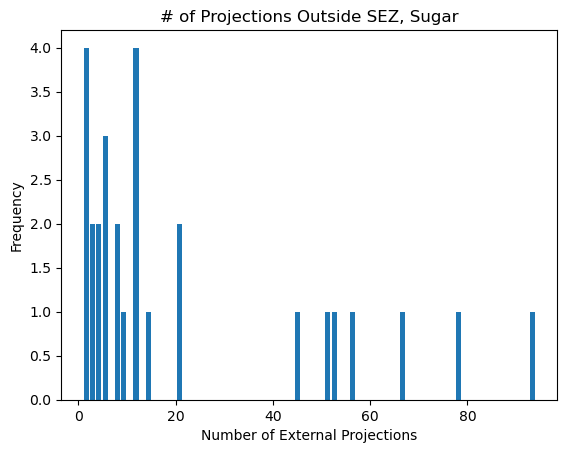

In [63]:
data = sugar_second_order_projection['#_of_external_projections']

num_bins = len(sugar_second_order_projection)
bins = np.linspace(1, max(data), num_bins + 1)
frequencies, bin_edges = np.histogram(data, bins)
bin_labels = [(bins[i] + bins[i+1]) / 2 for i in range(len(bins)-1)]
plt.bar(bin_labels, frequencies, width=(max(data) - min(data)) / num_bins * 0.8, align='center')
plt.xlabel('Number of External Projections')
plt.ylabel('Frequency')
plt.title('# of Projections Outside SEZ, Sugar')
plt.show()

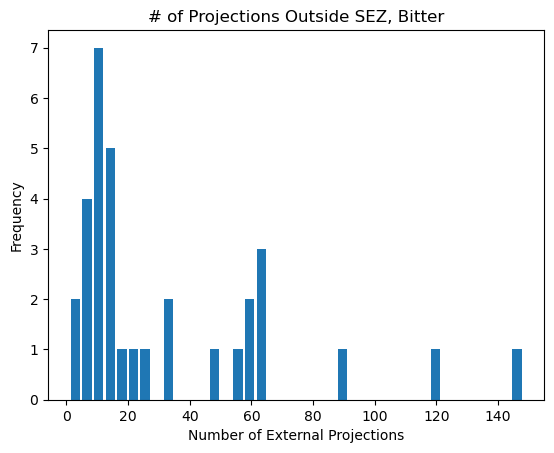

In [64]:
data = bitter_second_order_projection['#_of_external_projections']

num_bins = len(bitter_second_order_projection)
bins = np.linspace(1, max(data), num_bins + 1)
frequencies, bin_edges = np.histogram(data, bins)
bin_labels = [(bins[i] + bins[i+1]) / 2 for i in range(len(bins)-1)]
plt.bar(bin_labels, frequencies, width=(max(data) - min(data)) / num_bins * 0.8, align='center')
plt.xlabel('Number of External Projections')
plt.ylabel('Frequency')
plt.title('# of Projections Outside SEZ, Bitter')
plt.show()

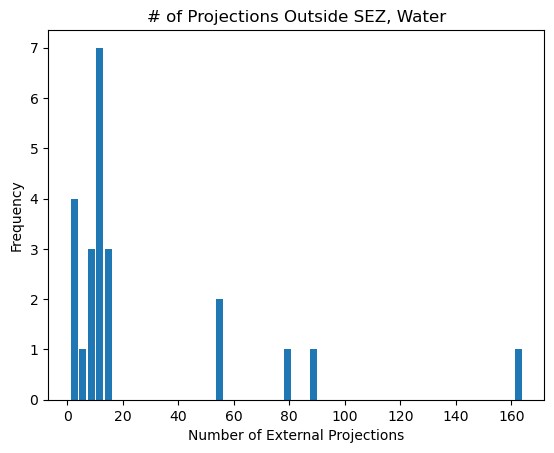

In [65]:
data = water_second_order_projection['#_of_external_projections']

num_bins = len(water_second_order_projection)
bins = np.linspace(1, max(data), num_bins + 1)
frequencies, bin_edges = np.histogram(data, bins)
bin_labels = [(bins[i] + bins[i+1]) / 2 for i in range(len(bins)-1)]
plt.bar(bin_labels, frequencies, width=(max(data) - min(data)) / num_bins * 0.8, align='center')
plt.xlabel('Number of External Projections')
plt.ylabel('Frequency')
plt.title('# of Projections Outside SEZ, Water')
plt.show()

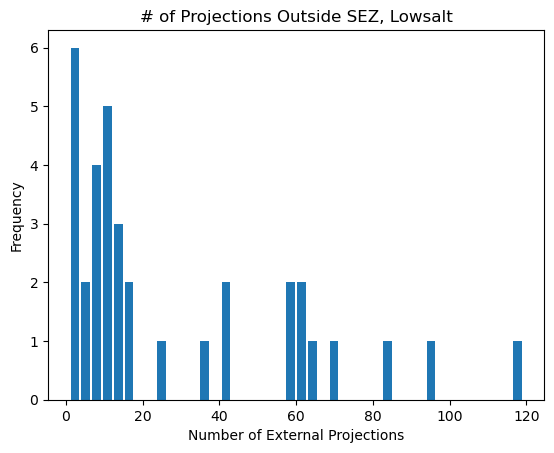

In [66]:
data = lowsalt_second_order_projection['#_of_external_projections']

num_bins = len(lowsalt_second_order_projection)
bins = np.linspace(1, max(data), num_bins + 1)
frequencies, bin_edges = np.histogram(data, bins)
bin_labels = [(bins[i] + bins[i+1]) / 2 for i in range(len(bins)-1)]
plt.bar(bin_labels, frequencies, width=(max(data) - min(data)) / num_bins * 0.8, align='center')
plt.xlabel('Number of External Projections')
plt.ylabel('Frequency')
plt.title('# of Projections Outside SEZ, Lowsalt')
plt.show()

In [67]:
all(sugar_third_order[sugar_third_order['second_order_cell_ID'] == entry]['location_of_connection'] == 'local')

True

In [68]:
bitter_third_order[bitter_third_order['second_order_cell_ID'] == 720575940620553094]

,second_order_cell_ID,second_order_cell_label,third_order_cell_ID,neuropil,syn_count,nt_type,location_of_connection
439,720575940620553094,['SEZ interneuron closely matching GRN arbors'],720575940602353632,GNG,21,GABA,local
440,720575940620553094,['SEZ interneuron closely matching GRN arbors'],720575940603266592,GNG,16,GABA,local
441,720575940620553094,['SEZ interneuron closely matching GRN arbors'],720575940603765937,GNG,6,GABA,local
443,720575940620553094,['SEZ interneuron closely matching GRN arbors'],720575940606279179,GNG,5,GABA,local
445,720575940620553094,['SEZ interneuron closely matching GRN arbors'],720575940606343945,GNG,6,GABA,local
...,...,...,...,...,...,...,...
820,720575940620553094,['SEZ interneuron closely matching GRN arbors'],720575940646212996,GNG,19,GABA,local
821,720575940620553094,['SEZ interneuron closely matching GRN arbors'],720575940646250804,PRW,6,GABA,outside SEZ
822,720575940620553094,['SEZ interneuron closely matching GRN arbors'],720575940646250804,GNG,10,GABA,local
825,720575940620553094,['SEZ interneuron closely matching GRN arbors'],720575940646337924,PRW,6,GABA,outside SEZ


In [69]:
bitter_second_order_projection

,second_order_cell_ID,projection,#_of_external_projections
0,720575940638557312,outside SEZ,10
0,720575940626287336,local,0
0,720575940624273149,outside SEZ,13
0,720575940637742150,outside SEZ,9
0,720575940634788247,outside SEZ,12
0,720575940624253991,outside SEZ,12
0,720575940614139089,outside SEZ,65
0,720575940628024107,outside SEZ,24
0,720575940623381286,local,0
0,720575940620553094,outside SEZ,59


In [70]:
water_second_order_projection

,second_order_cell_ID,projection,#_of_external_projections
0,720575940622486922,local,0
0,720575940627821896,local,0
0,720575940612579053,local,0
0,720575940612950568,local,0
0,720575940616103218,outside SEZ,5
0,720575940612648106,outside SEZ,12
0,720575940635172191,local,0
0,720575940623629292,local,0
0,720575940639274147,outside SEZ,12
0,720575940632648612,outside SEZ,14


In [71]:
lowsalt_second_order_projection

,second_order_cell_ID,projection,#_of_external_projections
0,720575940624234254,outside SEZ,83
0,720575940631082124,local,0
0,720575940621953285,outside SEZ,12
0,720575940610683315,local,0
0,720575940628198503,local,0
0,720575940621375231,local,0
0,720575940626016017,local,0
0,720575940638218173,local,0
0,720575940624079544,local,0
0,720575940646250804,outside SEZ,2


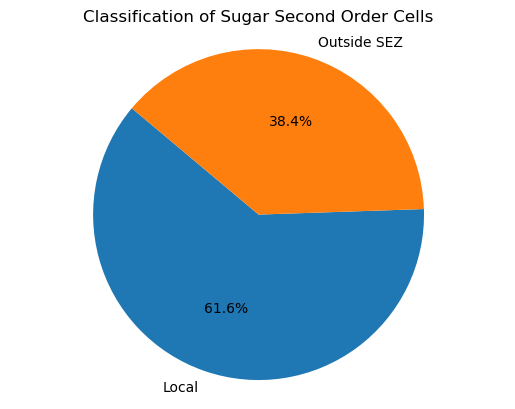

In [72]:
labels = ['Local', 'Outside SEZ']
sizes = [len(sugar_second_order_projection.query("projection == 'local'")), len(sugar_second_order_projection.query("projection == 'outside SEZ'"))]  
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Classification of Sugar Second Order Cells')
plt.axis('equal' )
plt.show()

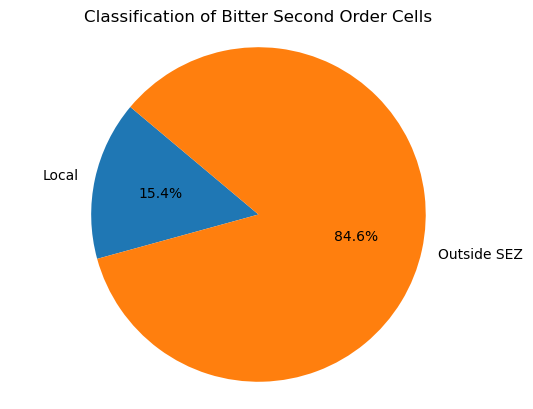

In [73]:
labels = ['Local', 'Outside SEZ']
sizes = [len(bitter_second_order_projection.query("projection == 'local'")), len(bitter_second_order_projection.query("projection == 'outside SEZ'"))]  
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Classification of Bitter Second Order Cells')
plt.axis('equal')
plt.show()

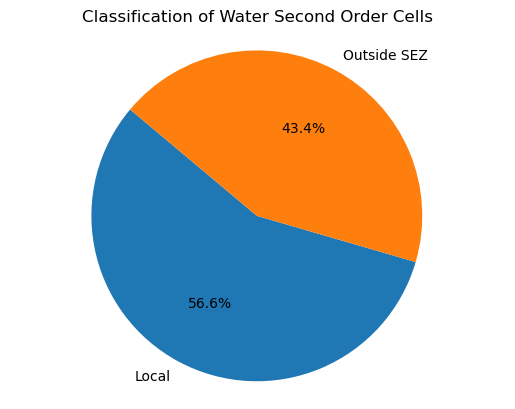

In [74]:
labels = ['Local', 'Outside SEZ']
sizes = [len(water_second_order_projection.query("projection == 'local'")), len(water_second_order_projection.query("projection == 'outside SEZ'"))]  
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Classification of Water Second Order Cells')
plt.axis('equal' )
plt.show()

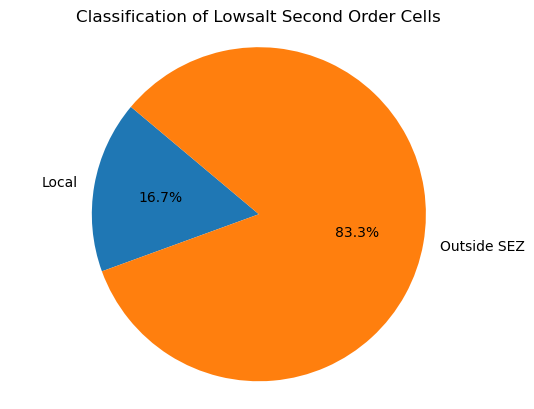

In [75]:
labels = ['Local', 'Outside SEZ']
sizes = [len(lowsalt_second_order_projection.query("projection == 'local'")), len(lowsalt_second_order_projection.query("projection == 'outside SEZ'"))]  
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Classification of Lowsalt Second Order Cells')
plt.axis('equal' )
plt.show()
plt.show()

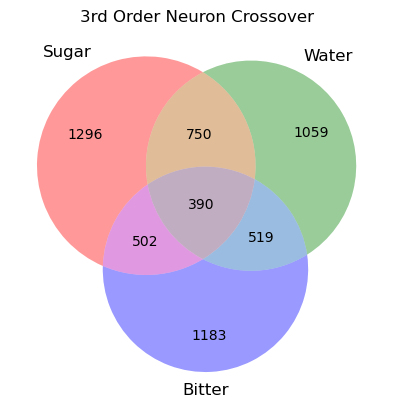

In [76]:
sugar = set(sugar_third_order['third_order_cell_ID'])
water = set(water_third_order['third_order_cell_ID'])
bitter = set(bitter_third_order['third_order_cell_ID'])

size_sugar = len(sugar)
size_water = len(water)
size_bitter = len(bitter)
overlap_sugarwater = len(sugar.intersection(water))
overlap_sugarbitter = len(sugar.intersection(bitter))
overlap_waterbitter = len(water.intersection(bitter))
overlap_sugarwaterbitter = len(sugar.intersection(water).intersection(bitter))

venn = venn3(subsets=(size_sugar, size_water, overlap_sugarwater, size_bitter, overlap_sugarbitter, overlap_waterbitter, overlap_sugarwaterbitter),
             set_labels=('Sugar', 'Water', 'Bitter'))

plt.title("3rd Order Neuron Crossover")
plt.show()

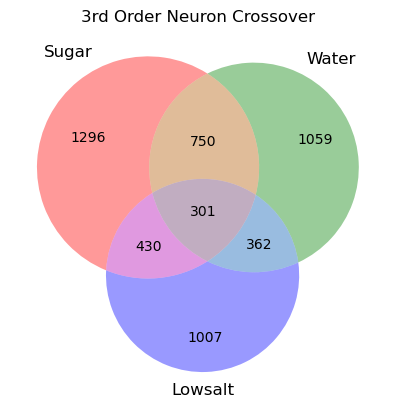

In [77]:
sugar = set(sugar_third_order['third_order_cell_ID'])
water = set(water_third_order['third_order_cell_ID'])
lowsalt = set(lowsalt_third_order['third_order_cell_ID'])

size_sugar = len(sugar)
size_water = len(water)
size_lowsalt = len(lowsalt)
overlap_sugarwater = len(sugar.intersection(water))
overlap_sugarlowsalt = len(sugar.intersection(lowsalt))
overlap_waterlowsalt = len(water.intersection(lowsalt))
overlap_sugarwaterlowsalt = len(sugar.intersection(water).intersection(lowsalt))

venn = venn3(subsets=(size_sugar, size_water, overlap_sugarwater, size_lowsalt, overlap_sugarlowsalt, overlap_waterlowsalt, overlap_sugarwaterlowsalt),
             set_labels=('Sugar', 'Water', 'Lowsalt'))

plt.title("3rd Order Neuron Crossover")
plt.show()

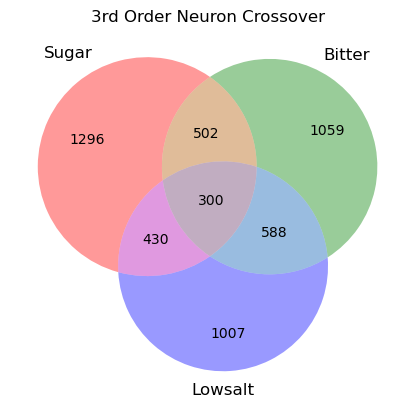

In [78]:
sugar = set(sugar_third_order['third_order_cell_ID'])
bitter = set(bitter_third_order['third_order_cell_ID'])
lowsalt = set(lowsalt_third_order['third_order_cell_ID'])

size_sugar = len(sugar)
size_bitter = len(water)
size_lowsalt = len(lowsalt)
overlap_sugarbitter = len(sugar.intersection(bitter))
overlap_sugarlowsalt = len(sugar.intersection(lowsalt))
overlap_bitterlowsalt = len(bitter.intersection(lowsalt))
overlap_sugarbitterlowsalt = len(sugar.intersection(bitter).intersection(lowsalt))

venn = venn3(subsets=(size_sugar, size_bitter, overlap_sugarbitter, size_lowsalt, overlap_sugarlowsalt, overlap_bitterlowsalt, overlap_sugarbitterlowsalt),
             set_labels=('Sugar', 'Bitter', 'Lowsalt'))

plt.title("3rd Order Neuron Crossover")
plt.show()

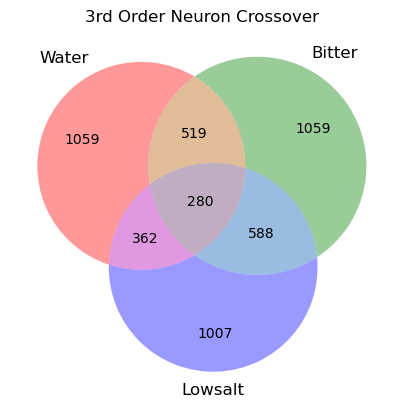

In [79]:
water = set(water_third_order['third_order_cell_ID'])
bitter = set(bitter_third_order['third_order_cell_ID'])
lowsalt = set(lowsalt_third_order['third_order_cell_ID'])

size_water = len(water)
size_bitter = len(water)
size_lowsalt = len(lowsalt)
overlap_waterbitter = len(water.intersection(bitter))
overlap_waterlowsalt = len(water.intersection(lowsalt))
overlap_bitterlowsalt = len(bitter.intersection(lowsalt))
overlap_waterbitterlowsalt = len(water.intersection(bitter).intersection(lowsalt))

venn = venn3(subsets=(size_water, size_bitter, overlap_waterbitter, size_lowsalt, overlap_waterlowsalt, overlap_bitterlowsalt, overlap_waterbitterlowsalt),
             set_labels=('Water', 'Bitter', 'Lowsalt'))

plt.title("3rd Order Neuron Crossover")
plt.show()